In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (15, 15)
matplotlib.rcParams['image.cmap'] = "Greys_r"

# Import the necessary packages

In [2]:
import hyperspy.api as hs
import numpy as np
import matplotlib.pyplot as plt
import skimage

/Users/nielscautaerts/opt/anaconda3/envs/devel/lib/python3.8/site-packages/pyUSID/viz/__init__.py:16: FutureWarning: Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. pyUSID.plot_utils will be removed in a future release of pyUSID
  warn('Please use sidpy.viz.plot_utils instead of pyUSID.viz.plot_utils. '


# Load the data

In [3]:
data_path = "Data/20200729 1253 STEM 31.4 Mx TM3-37c-lamelle018.emd"

In [4]:
data = hs.load(data_path)
data

[<Signal2D, title: HAADF, dimensions: (20|2048, 2048)>,
 <Signal2D, title: DCFI, dimensions: (20|2048, 2048)>]

# Check metadata

In [5]:
data[0].metadata

├── Acquisition_instrument
│   └── TEM
│       ├── Stage
│       │   ├── tilt_alpha = 4.421
│       │   ├── tilt_beta = -2.035
│       │   ├── x = 5.8e-05
│       │   ├── y = 5e-05
│       │   └── z = -0.000149
│       ├── beam_energy = 300.0
│       ├── camera_length = 102.0
│       ├── magnification = 29000000.0
│       └── microscope = Titan
├── General
│   ├── date = 2020-07-29
│   ├── original_filename = 20200729 1253 STEM 31.4 Mx TM3-37c-lamelle018.emd
│   ├── time = 12:53:43
│   ├── time_zone = CET
│   └── title = HAADF
└── Signal
    ├── Noise_properties
    │   └── Variance_linear_model
    │       ├── gain_factor = 35.14258942963786
    │       └── gain_offset = -2.004152526855453
    ├── binned = False
    └── signal_type =

In [6]:
data[0].original_metadata

├── Acquisition
│   ├── AcquisitionDatetime
│   │   └── DateTime = 0
│   ├── AcquisitionStartDatetime
│   │   └── DateTime = 1596020023
│   ├── BeamType = 
│   └── SourceType = Monochromator
├── BinaryResult
│   ├── AcquisitionUnit = 
│   ├── CompositionType = 
│   ├── Detector = HAADF
│   ├── DetectorIndex = 6
│   ├── Encoding = 
│   ├── Offset
│   │   ├── x = -1.5939186489329047e-09
│   │   └── y = -1.5939186489329047e-09
│   ├── PixelSize
│   │   ├── height = 1.5565611805985398e-12
│   │   └── width = 1.5565611805985398e-12
│   ├── PixelUnitX = m
│   └── PixelUnitY = m
├── Core
│   ├── MetadataDefinitionVersion = 7.9
│   ├── MetadataSchemaVersion = v1/2013/07
│   └── guid = 00000000000000000000000000000000
├── CustomProperties
│   ├── Aperture[C1].Name
│   │   ├── type = string
│   │   └── value = 2000
│   ├── Aperture[C2].Name
│   │   ├── type = string
│   │   └── value = 70
│   ├── Aperture[C3].Name
│   │   ├── type = string
│   │   └── value = 2000
│   ├── Aperture[OBJ].Name
│   │   ├── type = string
│   │   └── value = None
│   ├── Aperture[SA].Name
│   │   ├── type = string
│   │   └── value = None
│   ├── Detectors[SuperXG11].IncidentAngle
│   │   ├── type = double
│   │   └── value = 0.0945968
│   ├── Detectors[SuperXG11].SpectrumBeginEnergy
│   │   ├── type = long
│   │   └── value = 150
│   ├── Detectors[SuperXG11].Temperature
│   │   ├── type = double
│   │   └── value = 203.25
│   ├── Detectors[SuperXG12].IncidentAngle
│   │   ├── type = double
│   │   └── value = 0.0945968
│   ├── Detectors[SuperXG12].SpectrumBeginEnergy
│   │   ├── type = long
│   │   └── value = 150
│   ├── Detectors[SuperXG12].Temperature
│   │   ├── type = double
│   │   └── value = 203.15
│   ├── Detectors[SuperXG13].IncidentAngle
│   │   ├── type = double
│   │   └── value = 0.0945968
│   ├── Detectors[SuperXG13].SpectrumBeginEnergy
│   │   ├── type = long
│   │   └── value = 150
│   ├── Detectors[SuperXG13].Temperature
│   │   ├── type = double
│   │   └── value = 203.25
│   ├── Detectors[SuperXG14].IncidentAngle
│   │   ├── type = double
│   │   └── value = 0.0945968
│   ├── Detectors[SuperXG14].SpectrumBeginEnergy
│   │   ├── type = long
│   │   └── value = 150
│   ├── Detectors[SuperXG14].Temperature
│   │   ├── type = double
│   │   └── value = 203.25
│   ├── MaxPossiblePixelValue
│   │   ├── type = double
│   │   └── value = 65535
│   ├── Optics.MonoSpotSize
│   │   ├── type = string
│   │   └── value = <=11
│   ├── Scan.ScanTransformation.A11
│   │   ├── type = double
│   │   └── value = 1
│   ├── Scan.ScanTransformation.A12
│   │   ├── type = double
│   │   └── value = 0
│   ├── Scan.ScanTransformation.A13
│   │   ├── type = double
│   │   └── value = 0
│   ├── Scan.ScanTransformation.A21
│   │   ├── type = double
│   │   └── value = 0
│   ├── Scan.ScanTransformation.A22
│   │   ├── type = double
│   │   └── value = 1
│   ├── Scan.ScanTransformation.A23
│   │   ├── type = double
│   │   └── value = 0
│   └── StemMagnification
│       ├── type = double
│       └── value = 2.9e+07
├── DetectorMetadata
│   ├── CollectionAngleRange
│   │   ├── begin = 0.077871961317041077
│   │   └── end = 0.20000000000000001
│   ├── DetectorName = HAADF
│   ├── DetectorType = ScanningDetector
│   ├── Enabled = true
│   ├── Gain = 35.142589429637859
│   ├── Inserted = true
│   └── Offset = -2.004152526855453
├── Detectors
│   ├── Detector-0
│   │   ├── CollectionAngleRange
│   │   │   ├── begin = 0
│   │   │   └── end = 0.041464655283957756
│   │   ├── DetectorName = BF
│   │   ├── DetectorType = ScanningDetector
│   │   ├── Enabled = true
│   │   ├── Gain = 54.920837999999996
│   │   ├── Inserted = true
│   │   └── Offset = -1.1418750000000002
│   ├── Detector-1
│   │   ├── Binning
│   │   │   ├── height = 1
│   │   │   └── width = 1
│   │   ├── DarkGainCorrectionType = 2
│   │   ├── DetectorName = BM-Ceta
│   │   ├── DetectorType = ImagingDetector
│   │   ├── ExposureMode = 
│   │   ├── ExposureTime = 2
│   │   ├── ReadOutArea
│   │   │   ├── bottom 

# Preprocess the data

In [7]:
stack = data[0].copy()

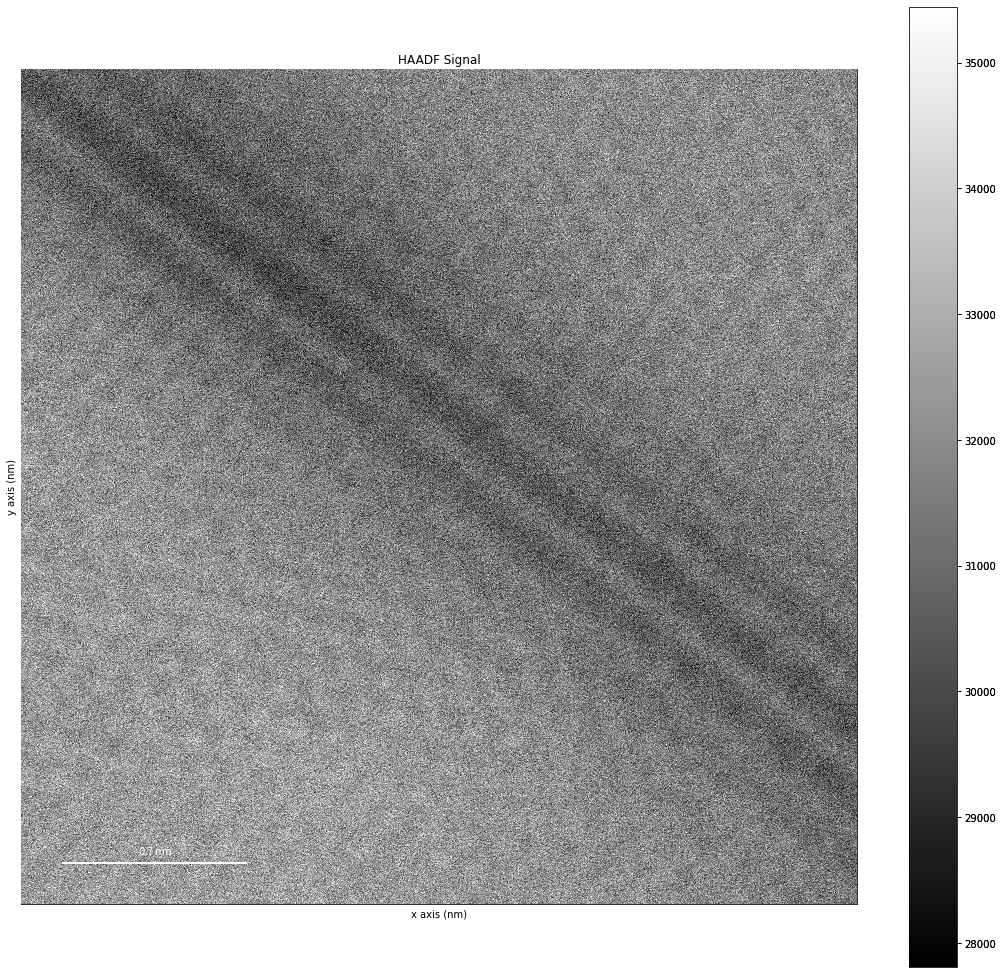

In [8]:
stack.mean().plot()

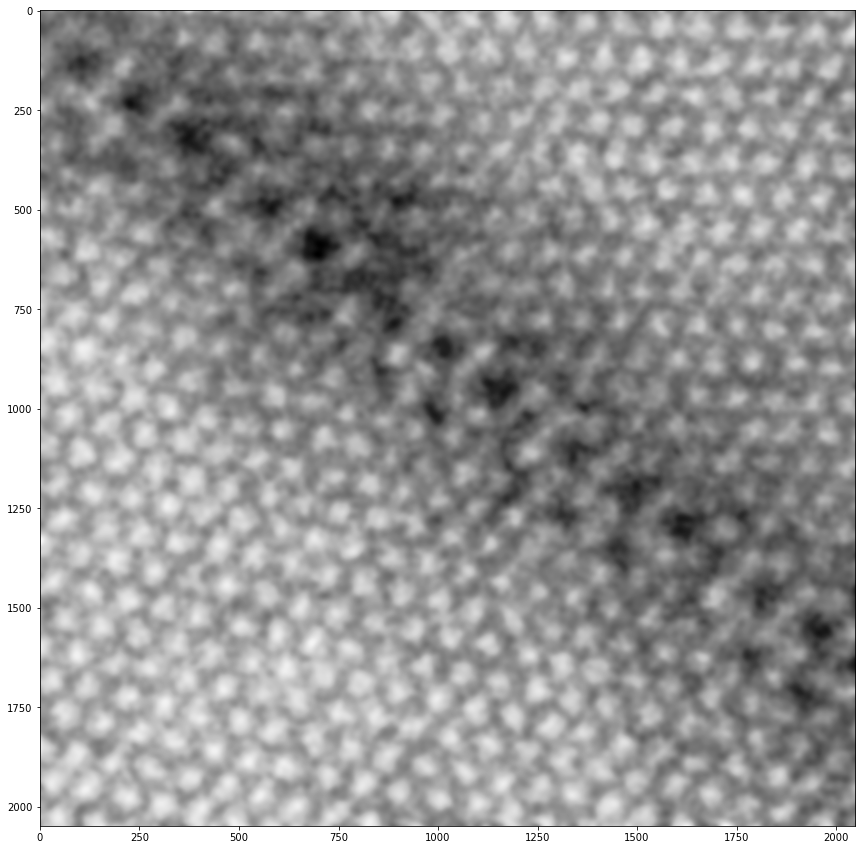

In [12]:
from skimage.filters import median, gaussian

image_test = stack.inav[0].data
disk = skimage.morphology.disk(5)
im_filt = gaussian(median(image_test, disk), sigma=8)

fig, ax = plt.subplots()
ax.imshow(im_filt)

In [13]:
filtered = stack.map(median, parallel=True, inplace=False, selem=disk)
filtered.map(gaussian, parallel=True, sigma=8)

  0%|          | 0/20 [00:00<?, ?it/s]

  0%|          | 0/20 [00:00<?, ?it/s]

In [14]:
shifts = filtered.estimate_shift2D(
#                                roi=(800, 1200, 800, 1200),
                               )

  0%|          | 0/20 [00:00<?, ?it/s]

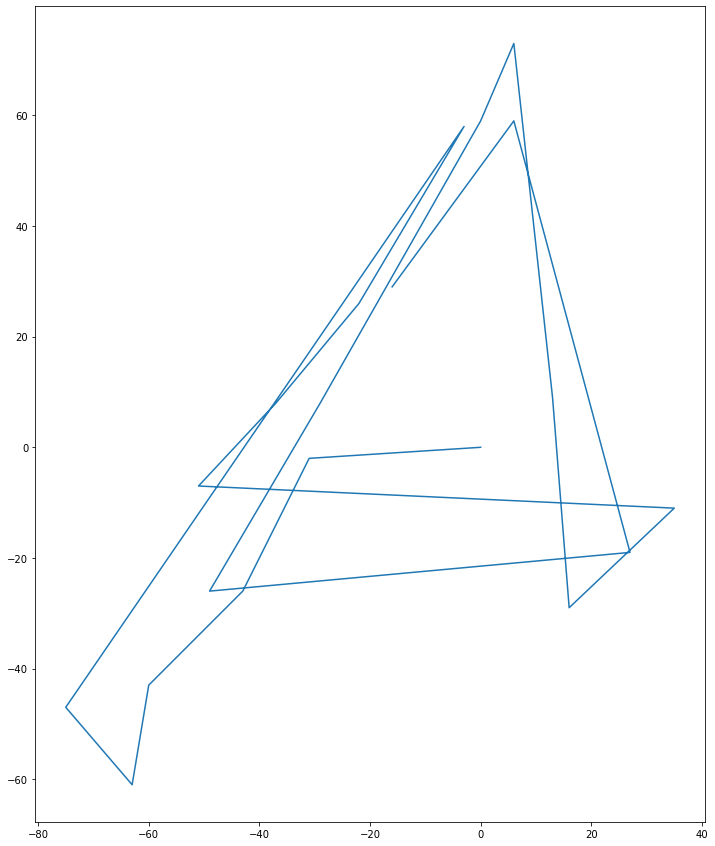

In [15]:
fig, ax = plt.subplots()
ax.set_aspect("equal")
ax.plot(shifts[:, 0], shifts[:, 1])

In [16]:
stack.align2D(crop=False,
              shifts=shifts,
             )

  0%|          | 0/20 [00:00<?, ?it/s]

In [17]:
average = stack.mean()

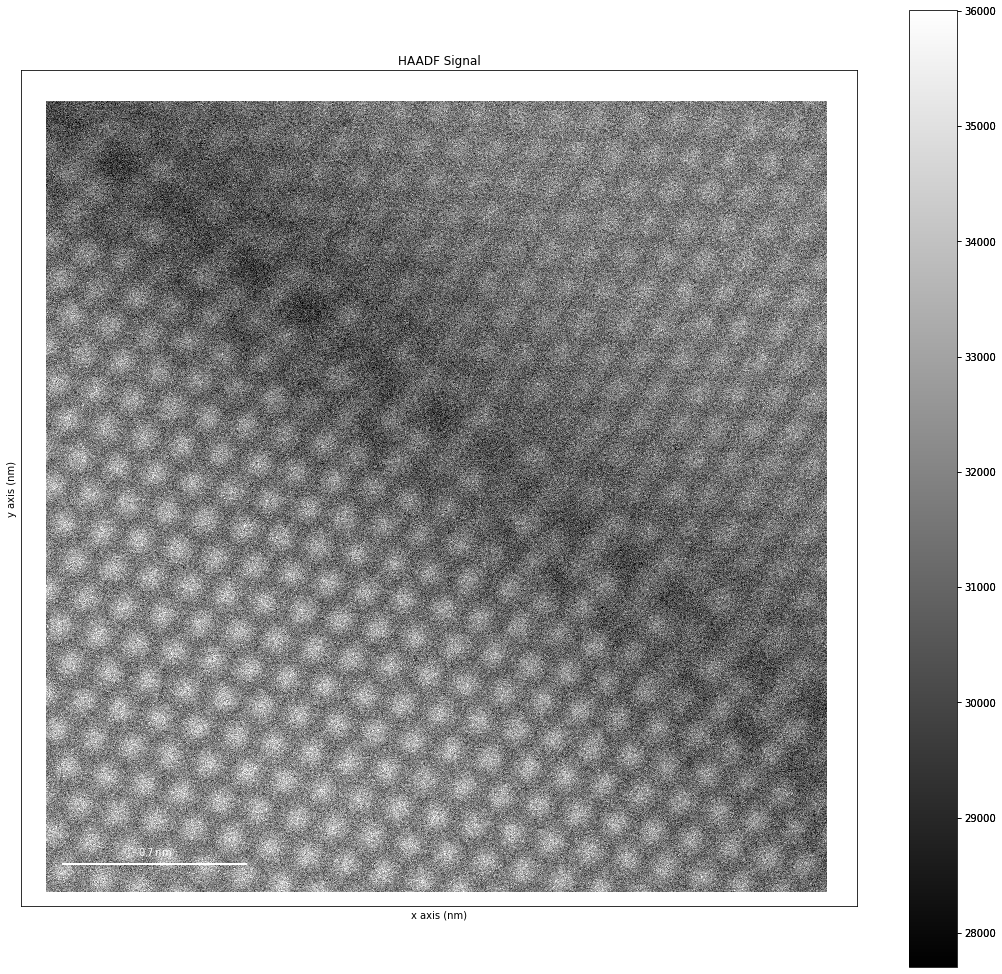

In [18]:
average.plot()

In [19]:
average.map(median, selem=disk)

  0%|          | 0/1 [00:00<?, ?it/s]

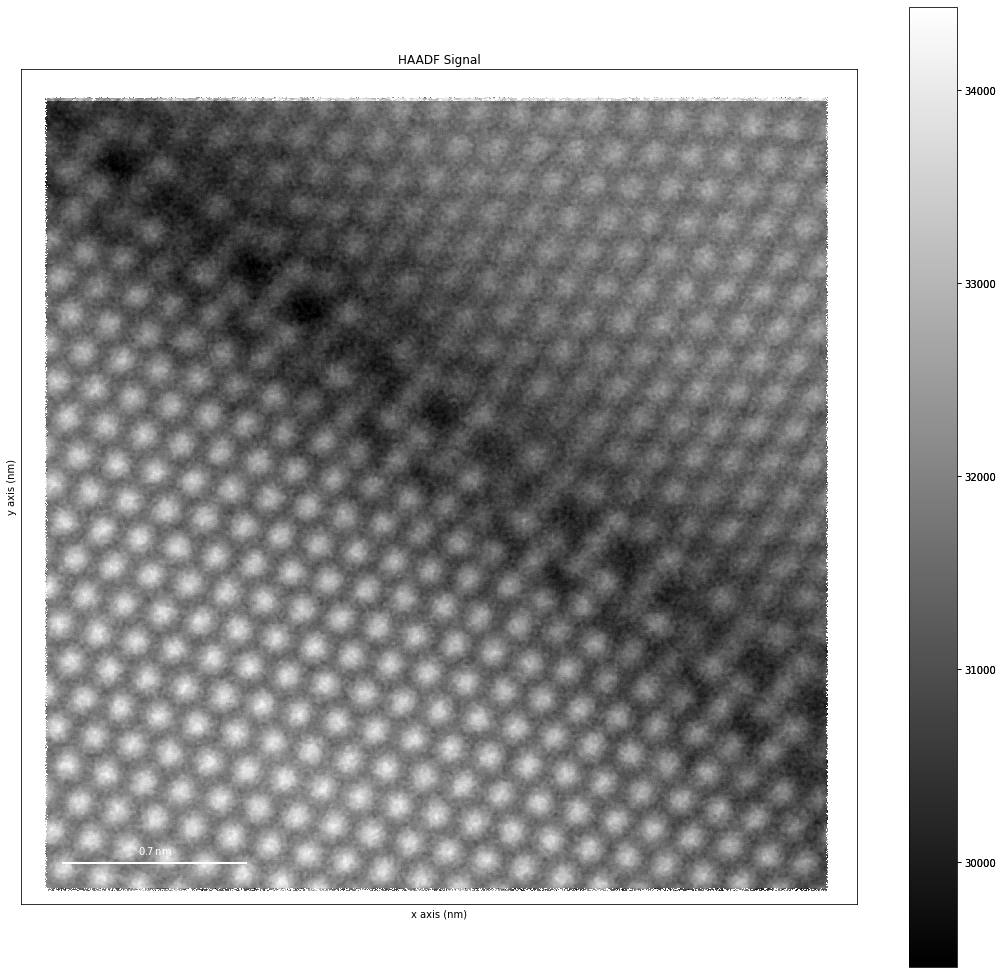

In [20]:
average.plot()

# Find peaks

In [21]:
from skimage.feature import peak_local_max
from skimage.filters import rank, gaussian
from skimage.morphology import disk
from skimage.morphology import ball

from skimage import img_as_float, img_as_ubyte

In [44]:
image = average.data[100:-100, 100:-100]
image = image / image.max()
image = img_as_ubyte(image)
selem = disk(150)
img_eq = gaussian(rank.equalize(image, selem=selem), sigma=15)

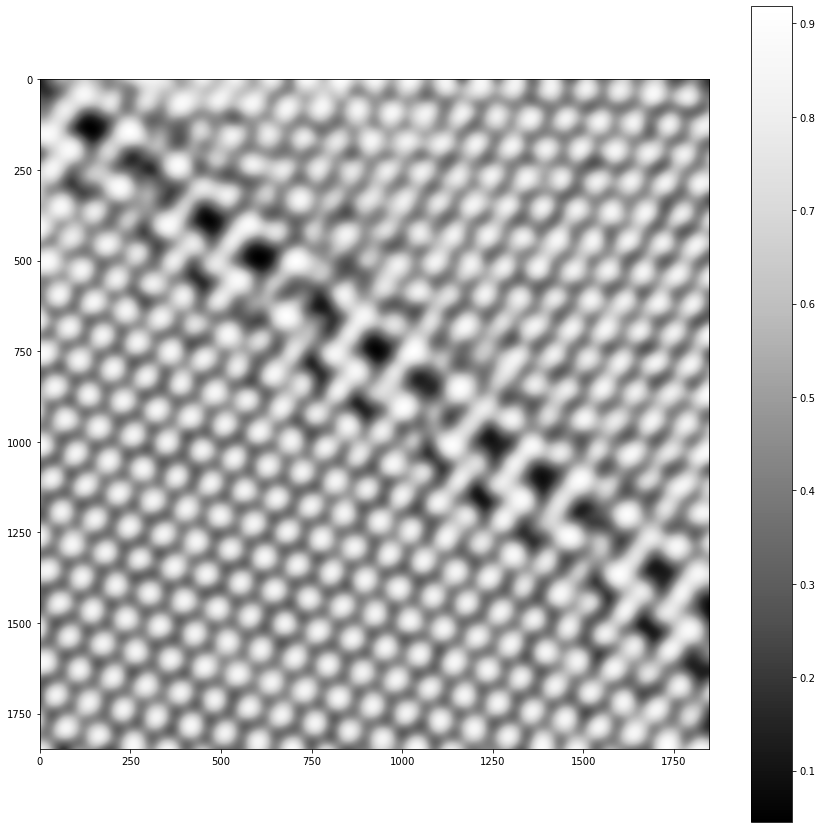

In [45]:
fig, ax = plt.subplots()
im = ax.imshow(img_eq)
#ax.scatter(coordinates[:,0], coordinates[:,1])
fig.colorbar(im)

In [46]:
image_float = img_as_float(img_eq)
coordinates = peak_local_max(image_float, min_distance=25, threshold_rel=0.1)

In [47]:
coordinates.shape

(388, 2)

In [48]:
from skimage import exposure

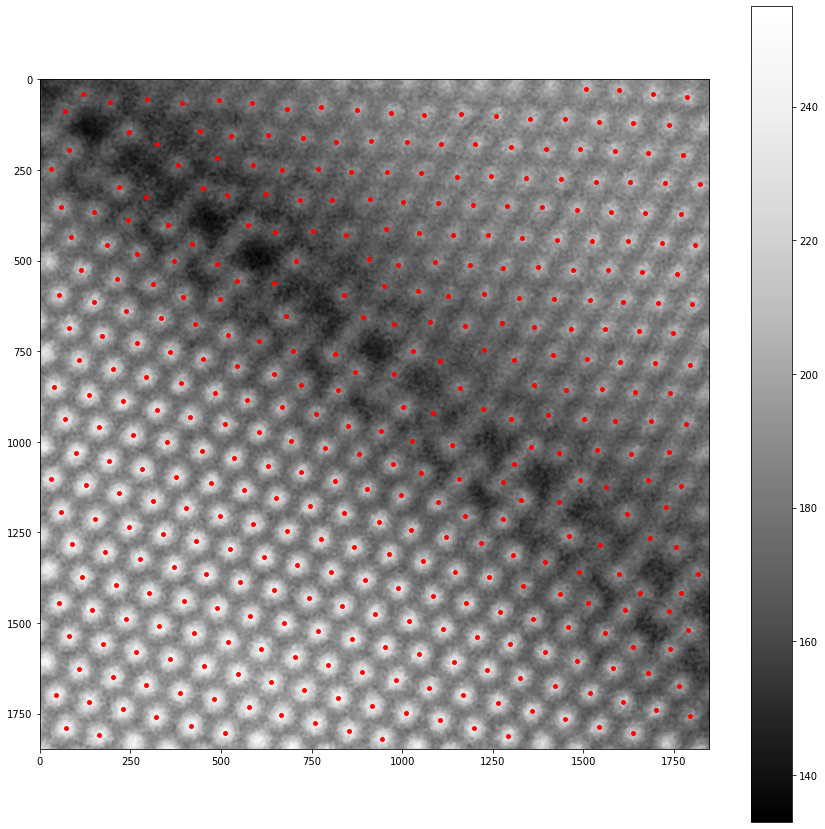

In [49]:
fig, ax = plt.subplots()
im = ax.imshow(exposure.adjust_gamma(image, gamma=4))
ax.scatter(coordinates[:,1], coordinates[:,0], s=15, c="red")
fig.colorbar(im)